In [1]:
import numpy as np
import ice_funcs as icef
import snowflake_plot as snp

import matplotlib.pyplot as plt

# Generation of snowflake

In [2]:
L = 501 # Length of simulation zone

# initialising snowflake class
SnowflakeSim = icef.SnowflakeSimulation(L)

# defining physical parameters
""" GAS KINETICS """
SnowflakeSim.PhysicsU.X_0 = 1
SnowflakeSim.PhysicsU.v_kin = 1 # not sure this does much except time

""" ATTACHMENT """
SnowflakeSim.PhysicsU.max_alpha = 1
SnowflakeSim.PhysicsU.b = 0.1

""" GEOMETRY CONTROL """
SnowflakeSim.PhysicsU.D_x = 1


print("Starting simulation")

# snowflake generating function
final_ice_map = SnowflakeSim.run_simulation(2000, initial_seed_half_width=100, initial_sat=1) 

Starting simulation
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900


# Plotting of snowflake

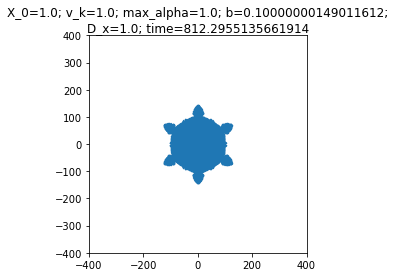

In [3]:
demi_largeur = 400 # demi-largeur du graphique

# paramètres graphiques
params = {"figure.dpi":2000}
plt.rcParams.update(params)

# conversion de ice_map vers des coordonnées
converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(final_ice_map)

# graphique du flocon
plt.figure()

# utilisation des marqueurs hexagonaux pour représenter les cellules de glace
plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.title(f"X_0={SnowflakeSim.PhysicsU.X_0}; v_k={SnowflakeSim.PhysicsU.v_kin}; max_alpha={SnowflakeSim.PhysicsU.max_alpha}; b={SnowflakeSim.PhysicsU.b}; D_x={SnowflakeSim.PhysicsU.D_x}; time={SnowflakeSim.global_time}", wrap=True) ###################################### SO ON SO FORTH

plt.show()